# 서울시 유가 정보 분석


### 요약
- 본 분석은 한국석유공사 오피넷의 데이터(2021.12.28 기준)를 selenium으로 크롤링한 데이터를 활용하여 진행하였다.
- 서울시 주유소의 상표는 SK에너지, 현대오일뱅크, GS칼텍스 순으로 많았다
- 휘발유의 가격이 높은 곳은 중구, 용산구, 강남구이며, 가격이 낮은 곳은 강서구, 양천구, 도봉구 순으로,
- 가장 비싼 가격과 싼 가격의 차이는 849원 차이가 났다.
- 경유의 가격 또한 중구, 용산구가 높았고 강서구, 양천구가 낮았다.
- 가장 비싼 가격과 싼 가격의 차이는 903원 차이가 났다.


### 결론
- 서울시의 유가는 서울의 중심(중구, 용산구)이 가장 높았고 서울 외곽(강서구, 양천구)의 유가가 가장 낮았다. 

In [1]:
from selenium import webdriver

In [34]:
driver = webdriver.Chrome('./Data/chromedriver.exe')

<ipython-input-34-72cef5d6b5a6>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./Data/chromedriver.exe')


In [35]:
driver.get('https://www.opinet.co.kr/searRgSelect.do')

# 서울시 유가 정보 획득을 위한 TEST

In [36]:
# 자치구명 정보 가져오기
#//*[@id="SIGUNGU_NM0"]
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

<ipython-input-36-364cd358da6d>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
C:\Users\rkdtj\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [37]:
# 조회버튼  click의 xpath //*[@id="searRgSelect"]/span
xpath = '//*[@id="searRgSelect"]/span'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

<ipython-input-37-ad1c861de333>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element_sel_gu = driver.find_element_by_xpath(xpath).click()


# 자치구명 선택과 조회버튼 click

In [38]:
# 자치구명 선택
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])
# 조회버튼 클릭
xpath = '//*[@id="searRgSelect"]/span'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

<ipython-input-38-7c397ad3c4b9>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id('SIGUNGU_NM0')
<ipython-input-38-7c397ad3c4b9>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element_sel_gu = driver.find_element_by_xpath(xpath).click()


In [ ]:
# 엑셀 저장 버튼 click
xpath = '//*[@id="glopopd_excel"]/span'
element_get_excel = driver.find_element_by_xpath(xpath).click()

# 서울시 유가 정보 분석
: 서울시 유가 정보 획득으로 얻은 데이터를 기준으로 

In [5]:
import pandas as pd
import numpy as np

# file name 합치기
from glob import glob

In [6]:
stations_files = glob('./Data/Oil/*.xls')
stations_files

['./Data/Oil\\지역_위치별(주유소) (1).xls',
 './Data/Oil\\지역_위치별(주유소) (10).xls',
 './Data/Oil\\지역_위치별(주유소) (11).xls',
 './Data/Oil\\지역_위치별(주유소) (12).xls',
 './Data/Oil\\지역_위치별(주유소) (13).xls',
 './Data/Oil\\지역_위치별(주유소) (14).xls',
 './Data/Oil\\지역_위치별(주유소) (15).xls',
 './Data/Oil\\지역_위치별(주유소) (16).xls',
 './Data/Oil\\지역_위치별(주유소) (17).xls',
 './Data/Oil\\지역_위치별(주유소) (18).xls',
 './Data/Oil\\지역_위치별(주유소) (19).xls',
 './Data/Oil\\지역_위치별(주유소) (2).xls',
 './Data/Oil\\지역_위치별(주유소) (20).xls',
 './Data/Oil\\지역_위치별(주유소) (21).xls',
 './Data/Oil\\지역_위치별(주유소) (22).xls',
 './Data/Oil\\지역_위치별(주유소) (23).xls',
 './Data/Oil\\지역_위치별(주유소) (24).xls',
 './Data/Oil\\지역_위치별(주유소) (3).xls',
 './Data/Oil\\지역_위치별(주유소) (4).xls',
 './Data/Oil\\지역_위치별(주유소) (5).xls',
 './Data/Oil\\지역_위치별(주유소) (6).xls',
 './Data/Oil\\지역_위치별(주유소) (7).xls',
 './Data/Oil\\지역_위치별(주유소) (8).xls',
 './Data/Oil\\지역_위치별(주유소) (9).xls',
 './Data/Oil\\지역_위치별(주유소).xls']

In [7]:
# 데이터 모두 불러오기
tmp_raw = []

for file_name in stations_files:
    # Excel file의 3번째 행이 header이므로 header = 2로 사용한다.
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
    
stations_raw = pd.concat(tmp_raw)

In [8]:
# 전체 data 갯수
len(stations_raw)

476

In [9]:
stations_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1639,1452,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1663,1457,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1795,1665,1514,1200
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1675,1518,-
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1864,1685,1549,1300


In [10]:
# Data 정보
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      476 non-null    object
 1   상호      476 non-null    object
 2   주소      476 non-null    object
 3   상표      476 non-null    object
 4   전화번호    476 non-null    object
 5   셀프여부    476 non-null    object
 6   고급휘발유   476 non-null    object
 7   휘발유     476 non-null    object
 8   경유      476 non-null    object
 9   실내등유    476 non-null    object
dtypes: object(10)
memory usage: 40.9+ KB


In [11]:
# 필요부분 발췌
stations = pd.DataFrame({'Oil_store' : stations_raw['상호'],
                        '주소':stations_raw['주소'],
                         '휘발유가격' : stations_raw['휘발유'],
                         '경유가격' : stations_raw['경유'],
                         '셀프' : stations_raw['셀프여부'],
                         '상표' : stations_raw['상표']
                        })
stations.head()

,Oil_store,주소,휘발유가격,경유가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1639,1452,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1663,1457,N,현대오일뱅크
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1665,1514,N,GS칼텍스
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1675,1518,Y,GS칼텍스
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1685,1549,N,GS칼텍스


In [12]:
# 주유소별 자치구 항목 추가
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1639,1452,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1663,1457,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1665,1514,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1675,1518,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1685,1549,N,GS칼텍스,강동구


In [13]:
# 자치구 Data 확인
stations.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [14]:
# 휘발유 가격 정보가 '-'인 곳 확인
stations[stations.휘발유가격 == '-']
# 휘발유 가격 정보가 있는 곳 확인
stations = stations[stations.휘발유가격 != '-']
# 가격이 '-'인 곳 제거
stations.휘발유가격 = [float(value) for value in stations['휘발유가격']]
stations.경유가격 = [float(value) for value in stations['경유가격']]

In [15]:
# index 재구성 
stations.reset_index(inplace=True)

In [16]:
# index column 제거
del stations['index']

In [17]:
stations

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1639.0,1452.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1663.0,1457.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1665.0,1514.0,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1675.0,1518.0,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1685.0,1549.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...
460,SK논현주유소,서울 강남구 논현로 747 (논현동),2095.0,1889.0,N,SK에너지,강남구
461,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2114.0,1912.0,N,GS칼텍스,강남구
462,갤러리아주유소,서울 강남구 압구정로 426,2170.0,1954.0,N,SK에너지,강남구
463,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2258.0,2014.0,N,GS칼텍스,강남구


In [18]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 서울에서 어느 상표의 주유소가 많을까? 

In [19]:
stations.value_counts('상표')

상표
SK에너지     138
현대오일뱅크    120
GS칼텍스     114
S-OIL      80
알뜰주유소      10
자가상표        2
알뜰(ex)      1
dtype: int64

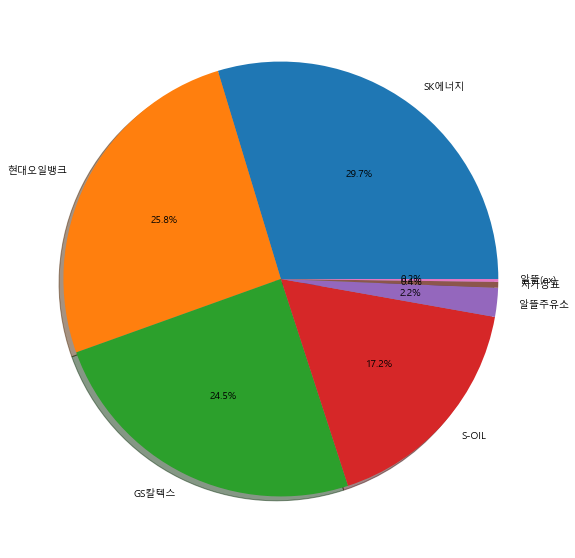

In [20]:
# 상표에 대한 파이차트 그리기 
plt.figure(figsize=(10,10))

plt.pie(stations.value_counts('상표'),
        autopct='%.1f%%',
        shadow=True,
        startangle=0,
        labels = ['SK에너지','현대오일뱅크','GS칼텍스','S-OIL','알뜰주유소','자가상표','알뜰(ex)']
       )

plt.show()

### Boxplot 그리기


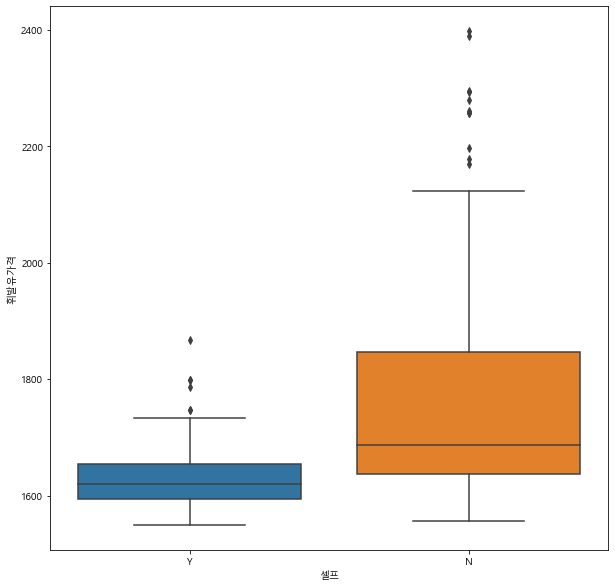

In [21]:
# 가격 컬럼을 셀프로 분류하여 boxplot 그리기
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(x=stations.셀프, y = stations.휘발유가격)
plt.show()

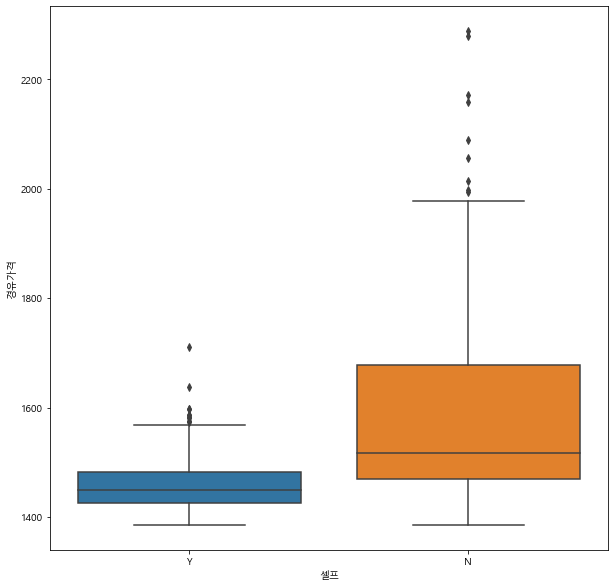

In [22]:
# 가격 컬럼을 셀프로 분류하여 boxplot 그리기
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(x=stations.셀프, y = stations.경유가격)
plt.show()

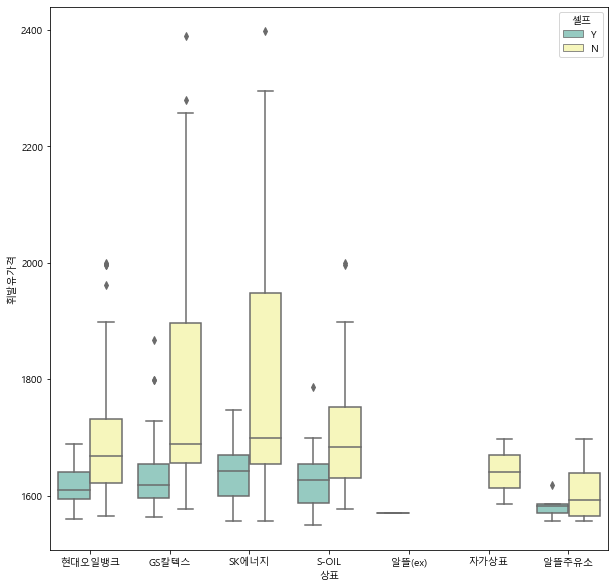

In [23]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(10,10))

sns.boxplot(x=stations.상표, y = stations.휘발유가격, hue = stations.셀프, palette='Set3')

plt.show()

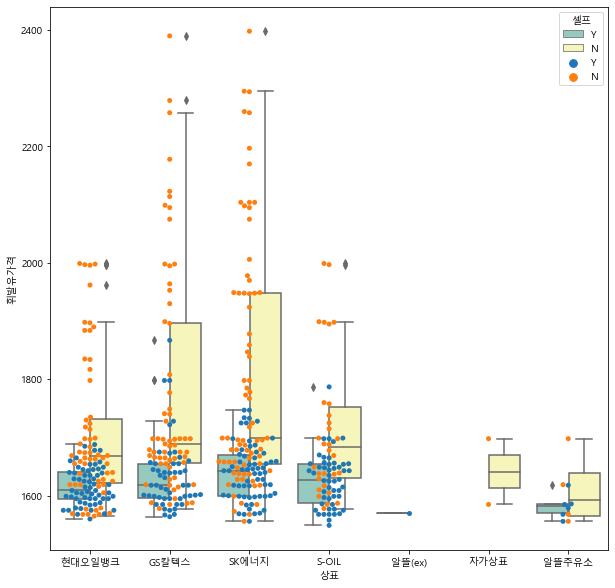

In [24]:
# swarmplot 그리기
plt.figure(figsize=(10,10))

sns.boxplot(x=stations.상표, y = stations.휘발유가격, hue = stations.셀프, palette='Set3')
sns.swarmplot(x=stations.상표, y = stations.휘발유가격, hue = stations.셀프,)

plt.show()

In [25]:
# 휘발유 가격이 높은 순으로 정렬
stations.sort_values(by = '휘발유가격', ascending=False).head(10)

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
289,서남주유소,서울 중구 통일로 30,2398.0,2288.0,N,SK에너지,중구
255,서계주유소,서울특별시 용산구 청파로 367 (청파동),2390.0,2280.0,N,GS칼텍스,용산구
464,뉴서울(강남),서울 강남구 언주로 716,2295.0,1995.0,N,SK에너지,강남구
288,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2294.0,2172.0,N,SK에너지,중구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2279.0,2159.0,N,GS칼텍스,중구
254,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2260.0,2090.0,N,SK에너지,용산구
14,강동주유소,서울 강동구 양재대로 1509 (길동),2258.0,2057.0,N,SK에너지,강동구
463,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2258.0,2014.0,N,GS칼텍스,강남구
103,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2197.0,1998.0,N,SK에너지,서초구
385,구로주유소,서울 구로구 구로동로 137 (구로동),2178.0,1978.0,N,GS칼텍스,구로구


In [26]:
# 경유 가격이 높은 순으로 정렬
stations.sort_values(by = '경유가격', ascending=False).head(10)

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
289,서남주유소,서울 중구 통일로 30,2398.0,2288.0,N,SK에너지,중구
255,서계주유소,서울특별시 용산구 청파로 367 (청파동),2390.0,2280.0,N,GS칼텍스,용산구
288,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2294.0,2172.0,N,SK에너지,중구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2279.0,2159.0,N,GS칼텍스,중구
254,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2260.0,2090.0,N,SK에너지,용산구
14,강동주유소,서울 강동구 양재대로 1509 (길동),2258.0,2057.0,N,SK에너지,강동구
463,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2258.0,2014.0,N,GS칼텍스,강남구
103,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2197.0,1998.0,N,SK에너지,서초구
464,뉴서울(강남),서울 강남구 언주로 716,2295.0,1995.0,N,SK에너지,강남구
385,구로주유소,서울 구로구 구로동로 137 (구로동),2178.0,1978.0,N,GS칼텍스,구로구


In [27]:
# 휘발유 가격이 낮은 순으로 정렬
stations.sort_values(by = '휘발유가격').head(10)

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
304,스카이주유소,서울 강서구 개화동로 457 (방화동),1549.0,1416.0,Y,S-OIL,강서구
306,화곡역주유소,서울 강서구 강서로 154 (화곡동),1556.0,1386.0,Y,알뜰주유소,강서구
305,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1556.0,1386.0,N,알뜰주유소,강서구
179,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1556.0,1386.0,N,SK에너지,양천구
178,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1556.0,1386.0,Y,SK에너지,양천구
180,현대주유소,서울 양천구 남부순환로 372 (신월동),1558.0,1388.0,Y,S-OIL,양천구
413,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1560.0,1400.0,Y,현대오일뱅크,도봉구
230,수유동주유소,서울 강북구 도봉로 395 (수유동),1564.0,1404.0,Y,GS칼텍스,강북구
414,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1565.0,1405.0,N,현대오일뱅크,도봉구
231,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1567.0,1407.0,Y,GS칼텍스,강북구


In [28]:
# 경유 가격이 낮은 순으로 정렬
stations.sort_values(by = '경유가격').head(10)

,Oil_store,주소,휘발유가격,경유가격,셀프,상표,구
309,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1575.0,1385.0,Y,SK에너지,강서구
178,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1556.0,1386.0,Y,SK에너지,양천구
179,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1556.0,1386.0,N,SK에너지,양천구
305,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1556.0,1386.0,N,알뜰주유소,강서구
306,화곡역주유소,서울 강서구 강서로 154 (화곡동),1556.0,1386.0,Y,알뜰주유소,강서구
71,만남의광장주유소,서울 서초구 양재대로12길 73-71,1571.0,1387.0,Y,알뜰(ex),서초구
183,신월주유소,서울 양천구 신월로 193 (신월동),1577.0,1388.0,Y,GS칼텍스,양천구
180,현대주유소,서울 양천구 남부순환로 372 (신월동),1558.0,1388.0,Y,S-OIL,양천구
15,삼영주유소,서울 동대문구 답십리로 258 (장안동),1568.0,1393.0,N,SK에너지,동대문구
307,방화주유소,서울 강서구 방화동로 58-2 (방화동),1573.0,1393.0,N,SK에너지,강서구


In [29]:
# 가장 비싼 가격과 싼 가격의 차이
print(stations.휘발유가격.max() - stations.휘발유가격.min())
print(stations.경유가격.max() - stations.경유가격.min())

849.0
903.0


### 구별 가격 평균

In [30]:
gu_data = stations.pivot_table('휘발유가격',index='구' ,aggfunc=np.mean).sort_values(by = '휘발유가격', ascending=False)
gu_data

,휘발유가격
구,
용산구,2038.230769
중구,2017.111111
종로구,1916.777778
강남구,1830.029412
강동구,1761.666667
서초구,1723.333333
성동구,1722.470588
마포구,1722.416667
영등포구,1685.703704


In [31]:
# 구별 가격 평균 지도 표시
import json
import folium

geo_path = './Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.55,126.98],
                 zoom_start=11,
                 tiles='stamen Toner'
                )
folium.Choropleth(geo_data=geo_str,
                 data=gu_data['휘발유가격'],
                 columns=[gu_data.index],
                  fill_color='YlOrRd',
                  key_on = 'feature.id'
                 ).add_to(map)
map

In [32]:
# Top10, Bottom10 저장
stations_top10 = pd.read_csv('./Data/stations_top10.csv')
stations_bottom10 = pd.read_csv('./Data/stations_bottom10.csv')

In [33]:
# 가격이 비싼 주유소 top10(red)와 가장 싼 주유소 bottom10(blue)
map = folium.Map(location=[37.55,126.98],
                 zoom_start=11,
                )
for n in stations_bottom10.index:
    folium.CircleMarker([stations_bottom10['경도'][n], stations_bottom10['위도'][n]],
                        radius=(stations_bottom10['가격'][n]/100), popup = stations_bottom10['가격'][n], color = 'blue',
                        fill = True, 
                       ).add_to(map)
for n in stations_top10.index:
    folium.CircleMarker([stations_top10['경도'][n], stations_top10['위도'][n]],
                        radius=(stations_top10['가격'][n]/100), popup = stations_top10['가격'][n], color = 'red',
                        fill = True, 
                       ).add_to(map)
map